In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df1=pd.read_csv('D:/AirPassenger.csv')

In [6]:
#Check data types
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

Year-Month column is not seen as a date object

In [17]:
df1 = pd.read_csv('D:/AirPassenger.csv', parse_dates=['Year-Month'])

C:\Users\vasan\AppData\Local\Temp\ipykernel_27616\2070135646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv('D:/AirPassenger.csv', parse_dates=['Year-Month'])


In [19]:
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [23]:
df1 = pd.read_csv('D:/AirPassenger.csv', parse_dates=['Year-Month'], index_col='Year-Month')


C:\Users\vasan\AppData\Local\Temp\ipykernel_27616\3509335181.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv('D:/AirPassenger.csv', parse_dates=['Year-Month'], index_col='Year-Month')


In [25]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
#We can conveniently do slicing i.e. obtain data for a specific time period.
df1['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [29]:
#We can check values corresponding to a specific time point
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

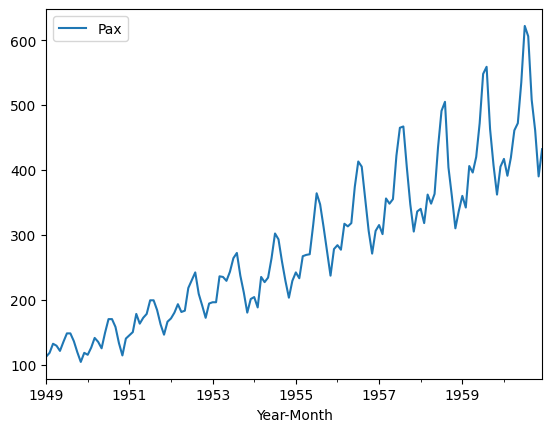

In [31]:
#Plot the time series
df1.plot()
plt.show()

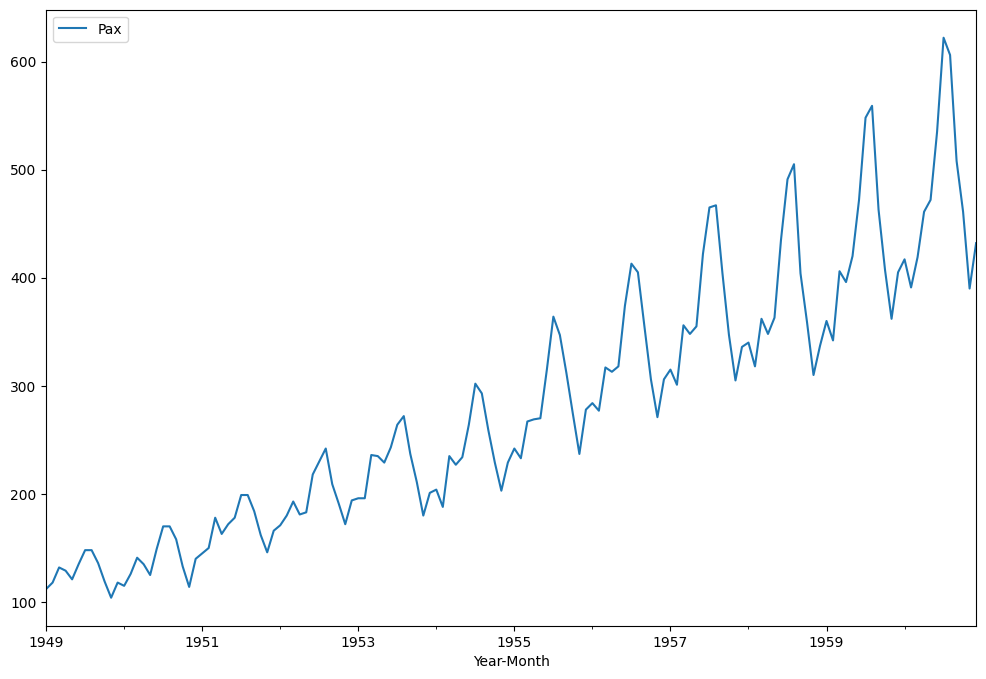

In [33]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

We see an increasing trend and seasonality which is not constant in nature.



In [36]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

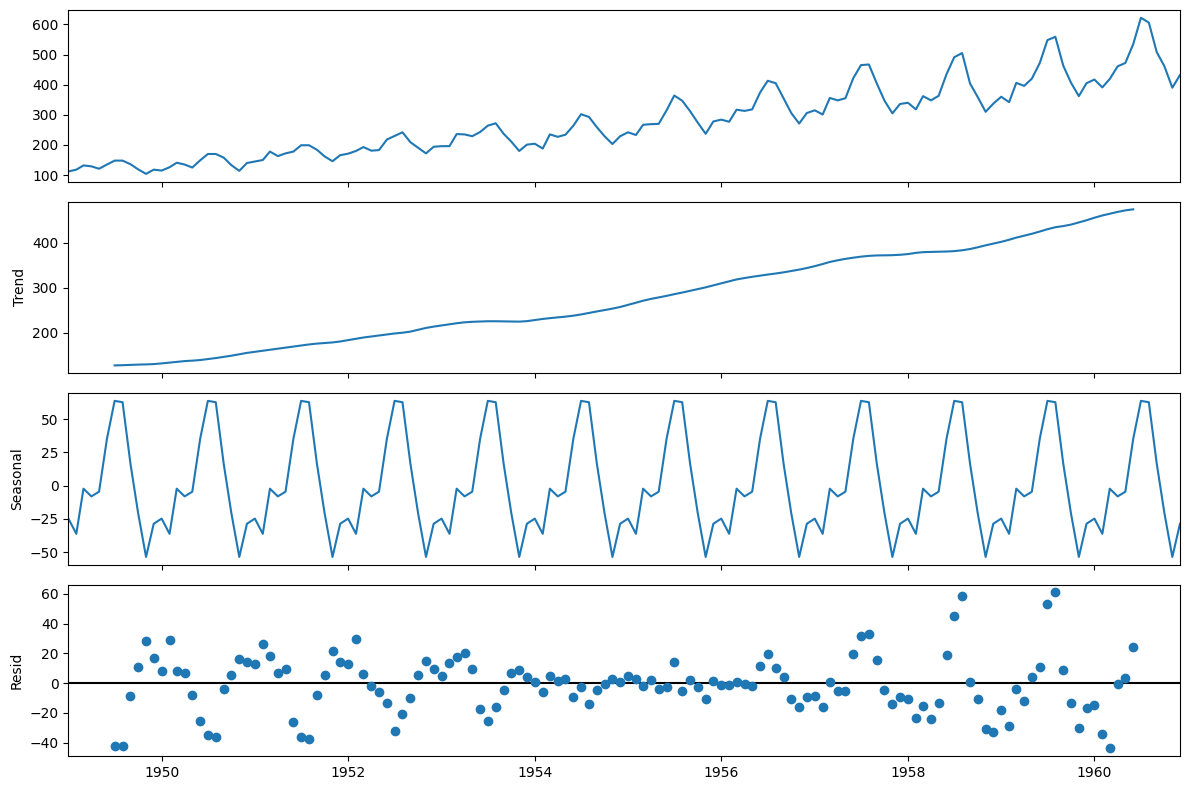

In [38]:
df1_add_decompose.plot()
plt.show()

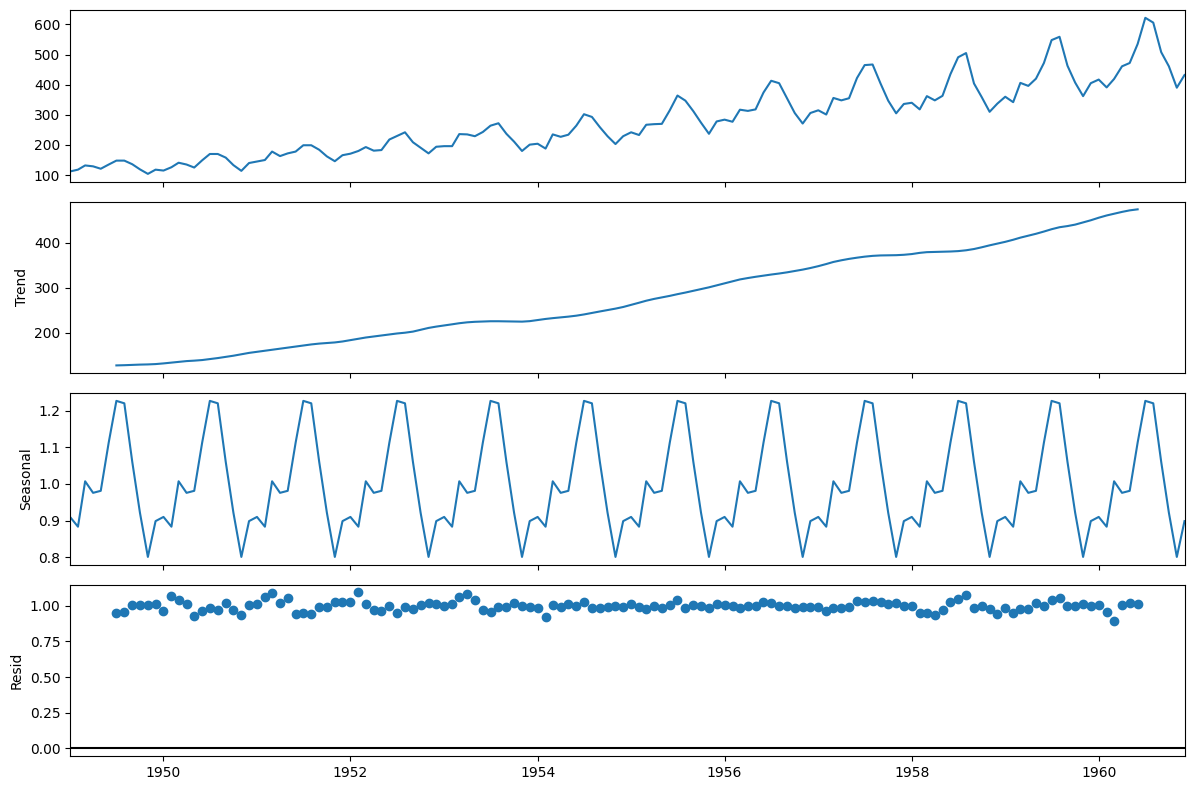

In [40]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [42]:
#Let's try to do log transformation
df1_log = df1.copy()

In [44]:
df1_log['Pax'] = np.log(df1)

In [46]:
df1_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

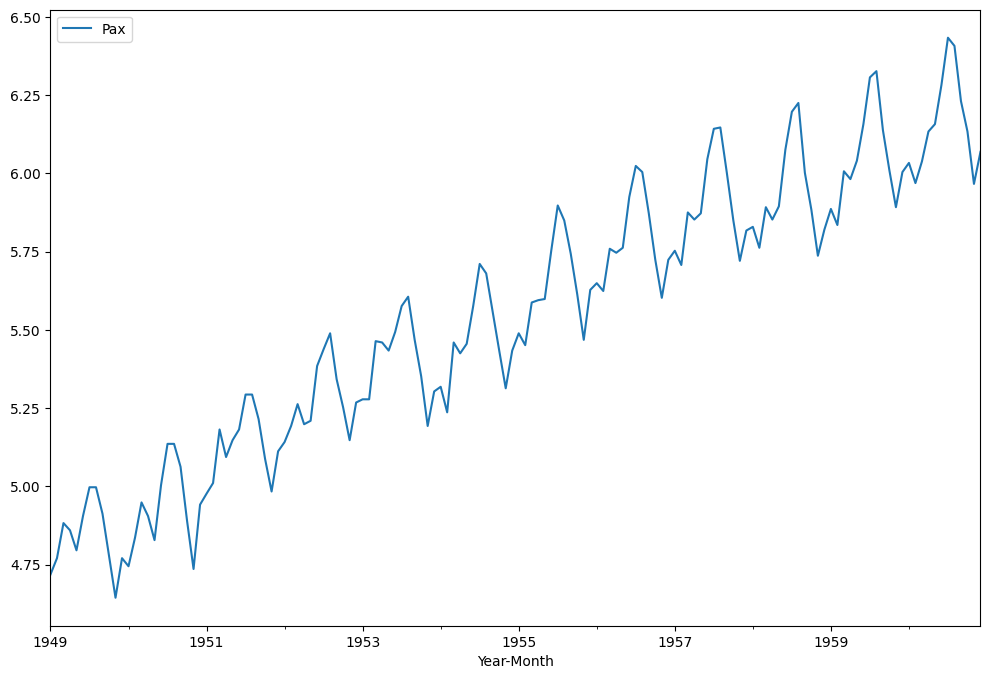

In [48]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

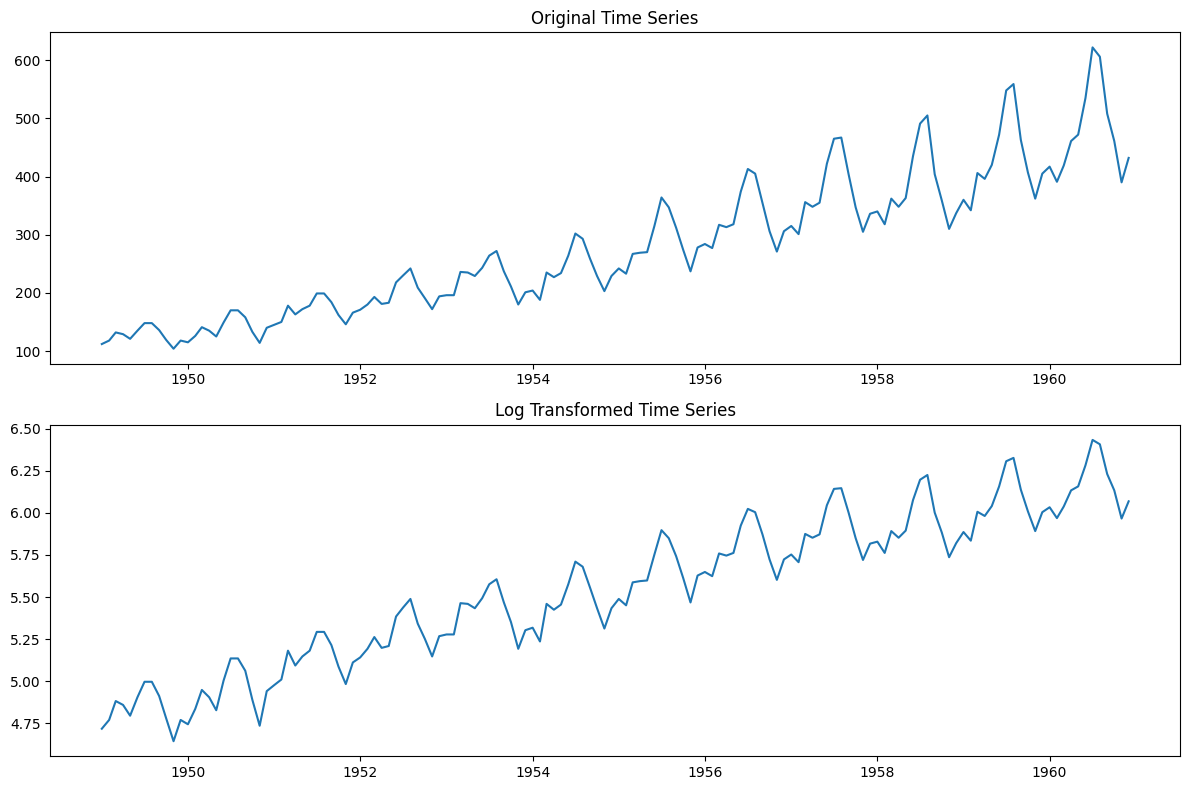

In [50]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()

0.2. Example 2

In [53]:
df2=pd.read_csv('D:/BirthRates.csv', parse_dates = ['Date'], index_col = 'Date')

In [55]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


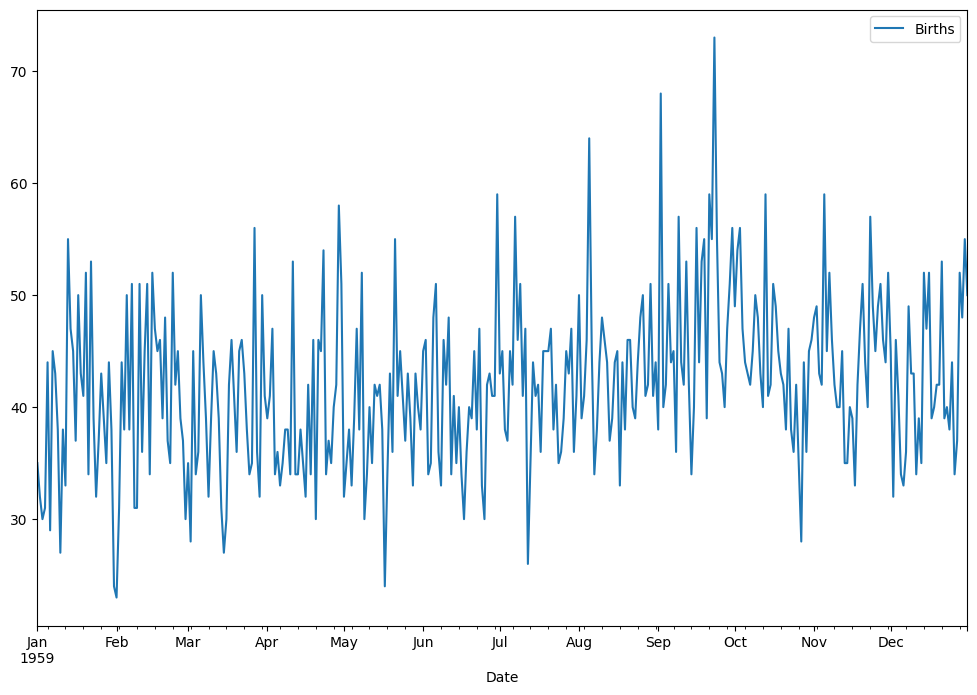

In [57]:
#Visualise the time series
df2.plot()
plt.show()

Doesn't show very clear trend and seasonality.

In [60]:
#Additive decomposition
df2_add_decompose = seasonal_decompose(df2, model = 'additive')

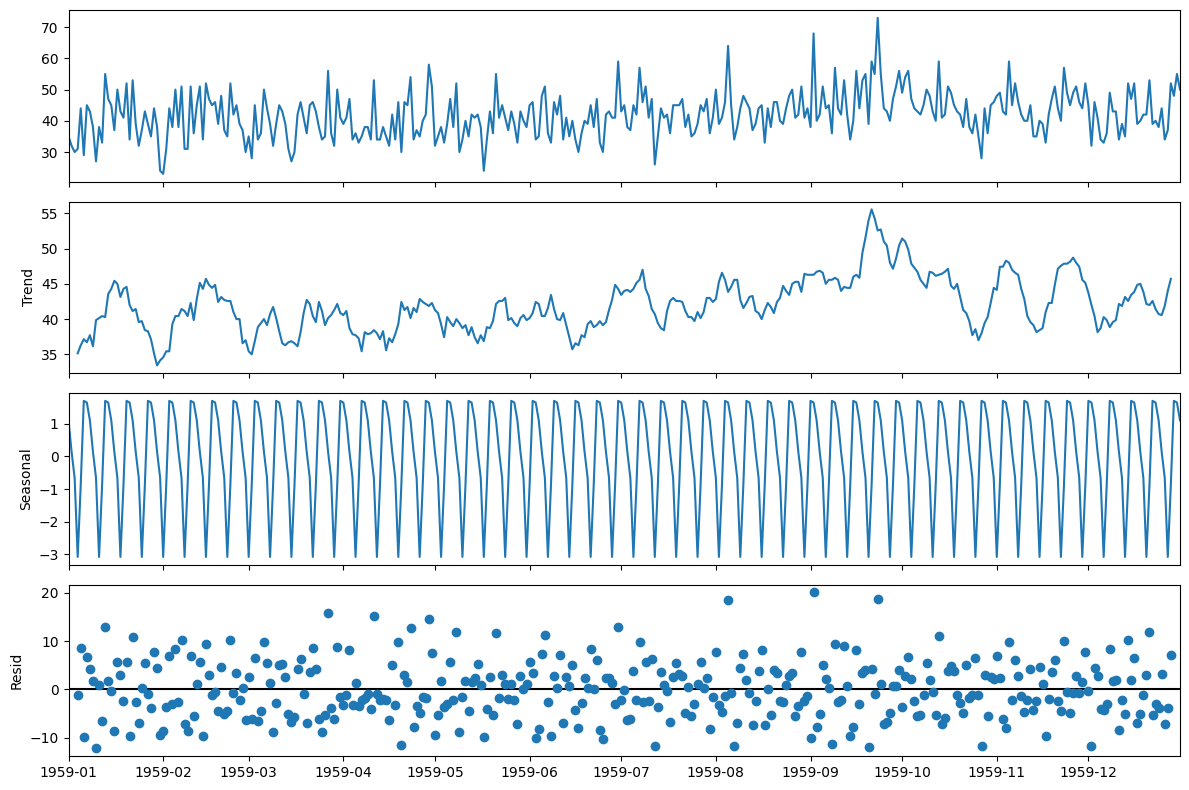

In [62]:
df2_add_decompose.plot()
plt.show()

In [64]:
#Let's inspect each component 
df2_add_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [66]:
df2_add_decompose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [68]:
df2_add_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [70]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
35.142857 -3.077608 -1.065249

31.0

In [72]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


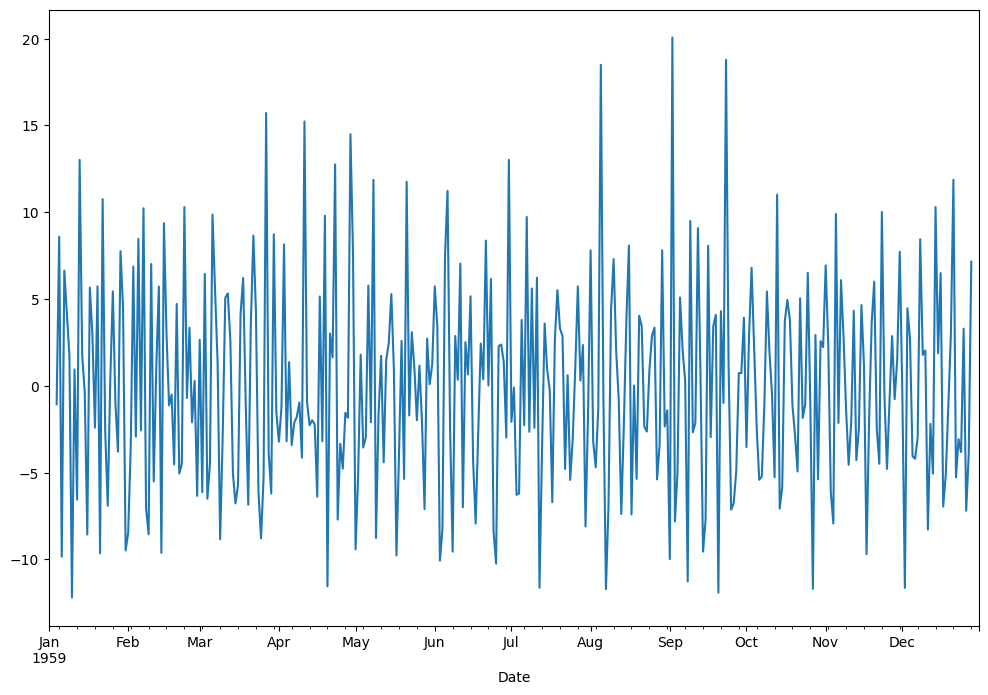

In [74]:
df2_add_decompose.resid.plot()
plt.show()

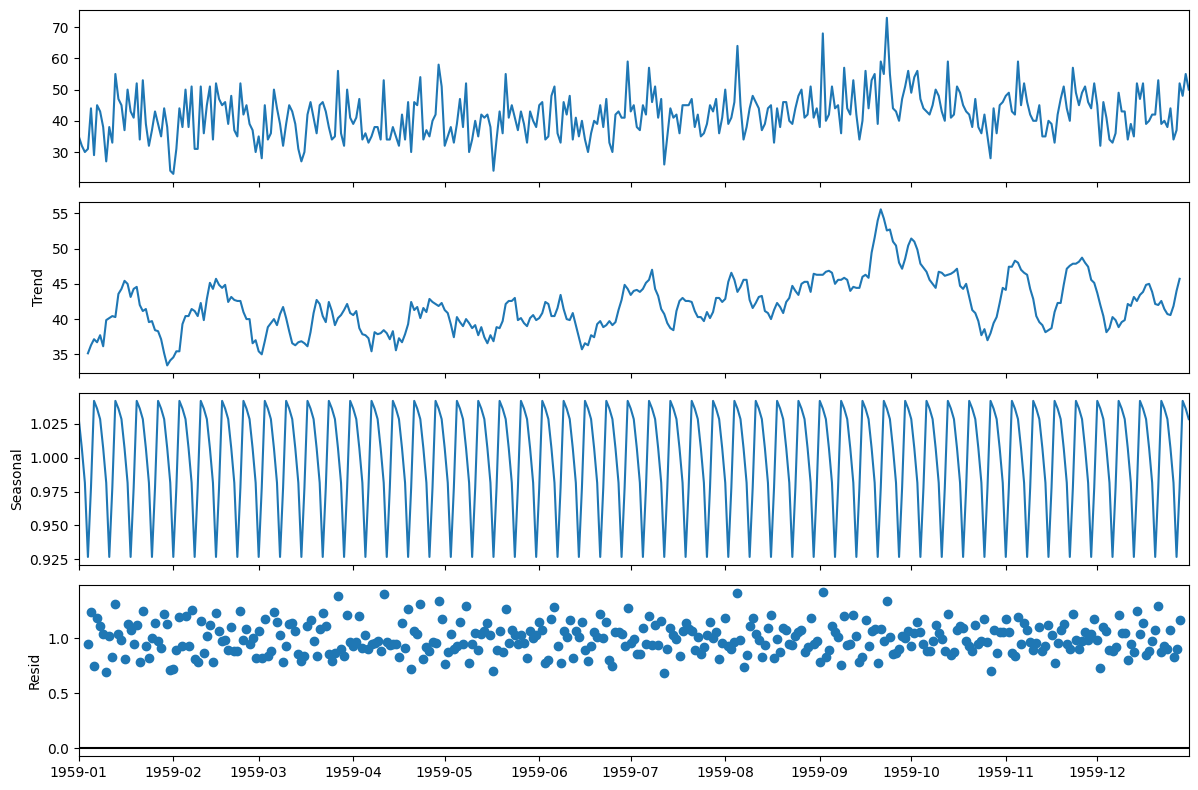

In [76]:
#Multiplicative decomposition
df2_mul_decompose = seasonal_decompose(df2, model = 'multiplicative')
df2_mul_decompose.plot()
plt.show()

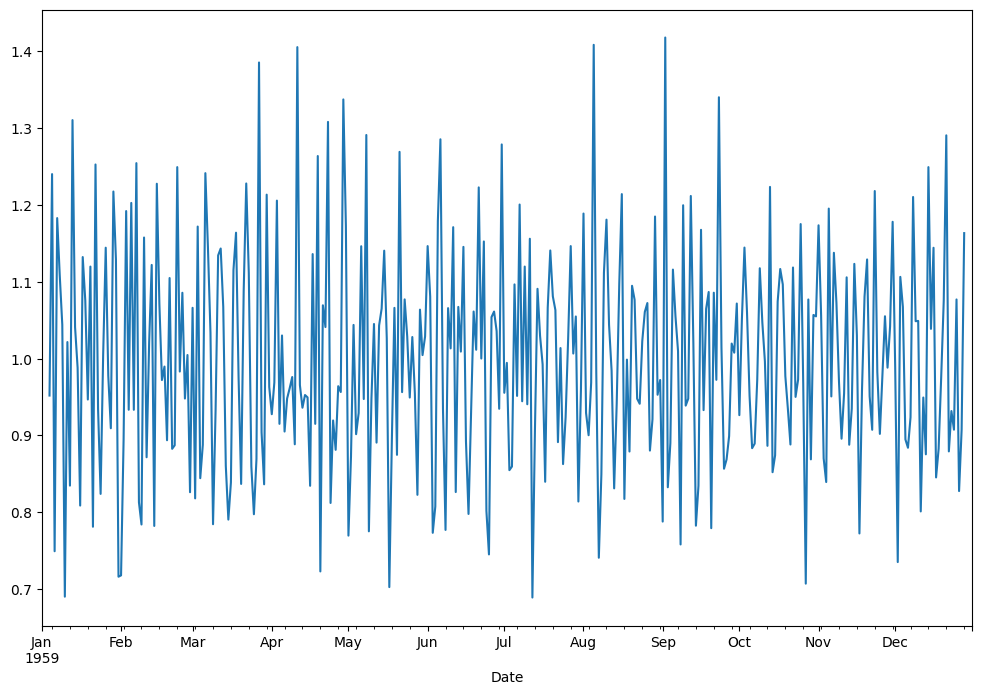

In [78]:
df2_mul_decompose.resid.plot()
plt.show()

In [80]:
#Let's inspect each component
df2_mul_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [82]:
df2_mul_decompose.seasonal

Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64

In [84]:
df2_mul_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [86]:
#Since this is a multiplicative model:
#Observed = Trend*Seasonality*Irregular
35.14*.93*.952

31.1115504

0.3. Downsampling

In [89]:
#Let's change the monthly series to quarterly. This would require aggregation.
df1_q = df1.resample('Q').mean()

C:\Users\vasan\AppData\Local\Temp\ipykernel_27616\237135107.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df1_q = df1.resample('Q').mean()


<Axes: xlabel='Year-Month'>

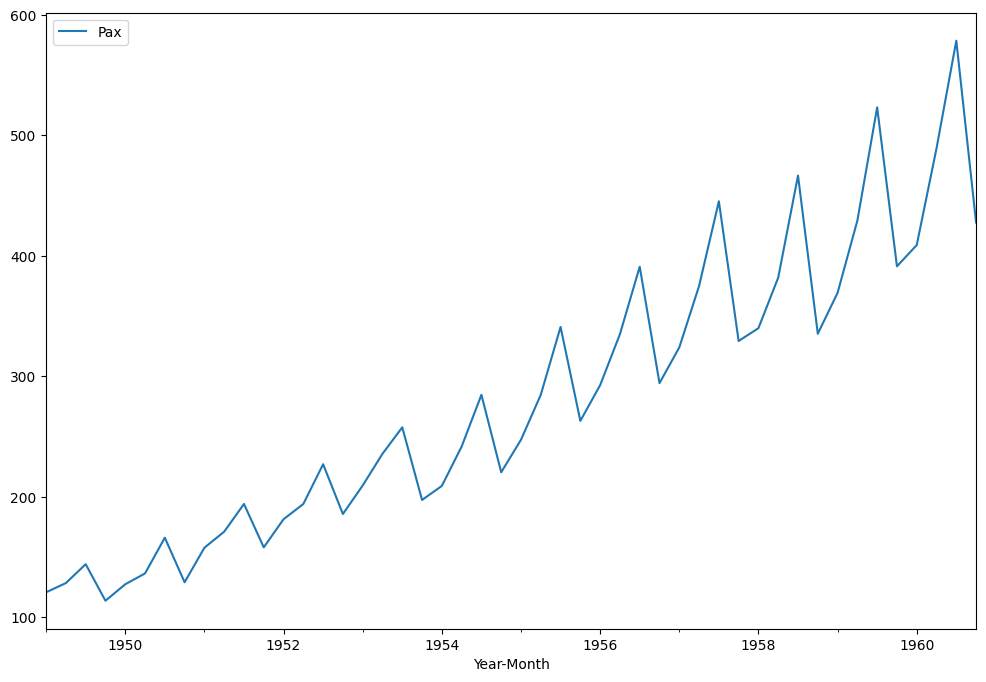

In [91]:
df1_q.plot()

0.4. Upsampling

In [94]:
#Let's change the monthly series to daily. 
df1_d = df1.resample('D').ffill()

In [98]:
print(df1.index)


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=144, freq=None)


In [100]:
print(df1.index.tolist())


[Timestamp('1949-01-01 00:00:00'), Timestamp('1949-02-01 00:00:00'), Timestamp('1949-03-01 00:00:00'), Timestamp('1949-04-01 00:00:00'), Timestamp('1949-05-01 00:00:00'), Timestamp('1949-06-01 00:00:00'), Timestamp('1949-07-01 00:00:00'), Timestamp('1949-08-01 00:00:00'), Timestamp('1949-09-01 00:00:00'), Timestamp('1949-10-01 00:00:00'), Timestamp('1949-11-01 00:00:00'), Timestamp('1949-12-01 00:00:00'), Timestamp('1950-01-01 00:00:00'), Timestamp('1950-02-01 00:00:00'), Timestamp('1950-03-01 00:00:00'), Timestamp('1950-04-01 00:00:00'), Timestamp('1950-05-01 00:00:00'), Timestamp('1950-06-01 00:00:00'), Timestamp('1950-07-01 00:00:00'), Timestamp('1950-08-01 00:00:00'), Timestamp('1950-09-01 00:00:00'), Timestamp('1950-10-01 00:00:00'), Timestamp('1950-11-01 00:00:00'), Timestamp('1950-12-01 00:00:00'), Timestamp('1951-01-01 00:00:00'), Timestamp('1951-02-01 00:00:00'), Timestamp('1951-03-01 00:00:00'), Timestamp('1951-04-01 00:00:00'), Timestamp('1951-05-01 00:00:00'), Timestamp('19

In [102]:
df1.loc[pd.Timestamp('1949-02-01')]


Pax    118
Name: 1949-02-01 00:00:00, dtype: int64

In [104]:
print(df1.head())


            Pax
Year-Month     
1949-01-01  112
1949-02-01  118
1949-03-01  132
1949-04-01  129
1949-05-01  121


<Axes: xlabel='Year-Month'>

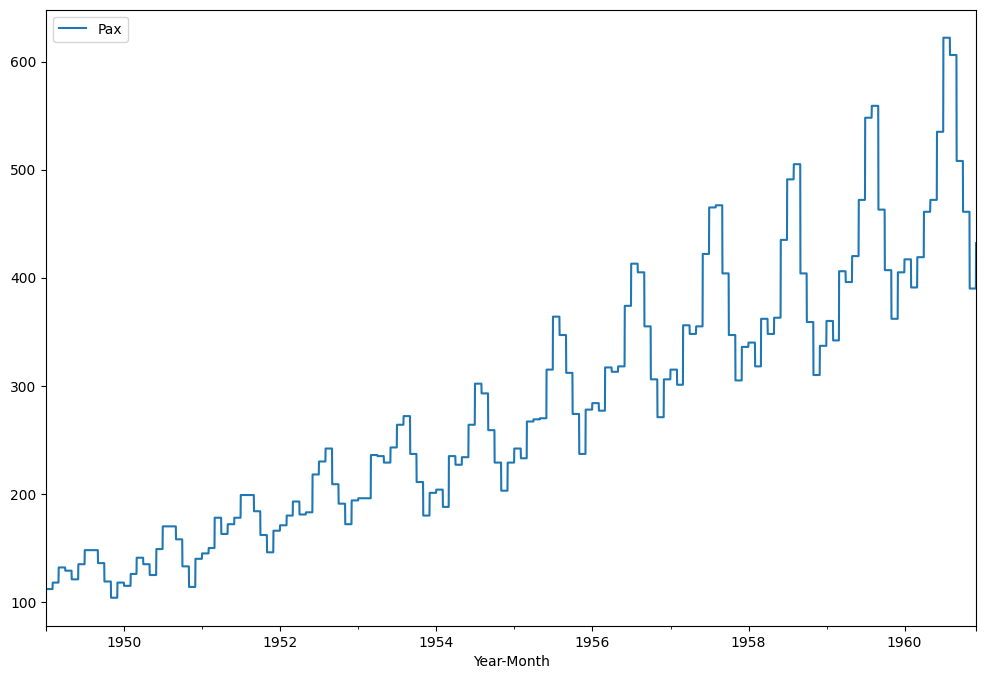

In [108]:
df1_d.plot()

In [110]:
#Let's change the monthly series to hourly. 
df1_h = df1.resample('H').interpolate()

C:\Users\vasan\AppData\Local\Temp\ipykernel_27616\566527773.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1_h = df1.resample('H').interpolate()
